<a href="https://colab.research.google.com/github/gptix/data-visualization/blob/master/Coal_Use_Historgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of distribution of coal consumption per plant to generate power in the United States in 2018.

*Last run from scratch, successfully, at  13:36 est, 22 Nov 2019*

## Data Sources

U.S. Energy Information Administration

https://www.eia.gov/



**Form EIA-923**

"The survey Form EIA-923 collects detailed electric power data -- monthly and annually -- on electricity generation, fuel consumption, fossil fuel stocks, and receipts at the power plant and prime mover level."

https://www.eia.gov/electricity/data/eia923/


## Software

Data Manipulation: Pandas

Vizualization: Plotly

Notebook Creation and coding: Google Colab

## Import great code.

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Ingest raw data.

In [0]:
url_base = "https://raw.githubusercontent.com/gptix/data-visualization/master/"

# set filenames
# Detailed data, including fuel type and annual production.
detail_filename = "EIA923_Schedules_2_3_4_5_M_12_2018_Final_Revision.csv"

# Plant data, including latitude and longitude.
plants_filename = "2___Plant_Y2018.csv"

detail_df = pd.read_csv(url_base + detail_filename)
plants_df = pd.read_csv(url_base + plants_filename, skiprows=1)

# detail_df.head(1)

In [0]:
# detail_df.columns

## Shape data, including removing or altering "NaNs"

In [0]:
# extract needed data
# filter for rows related to use of coal as fuel.
fuel_type = 'COL'
detail_df = detail_df[detail_df.AER_Fuel_Type_Code.isin([fuel_type])]
# detail_df.shape

# Re-shape detail_df to contain only columns needed.
detail_columns = detail_df.columns
detail_columns_needed = ['Plant_Id', 'Total_Fuel_Consumption_Quantity',
                         'Net_Generation_(Megawatthours)']

detail_columns_to_drop = list(set(detail_columns) - set(detail_columns_needed))
detail_df = detail_df.drop(columns=detail_columns_to_drop)

detail_df.columns
detail_df.head(1)

,Plant_Id,Total_Fuel_Consumption_Quantity,Net_Generation_(Megawatthours)
3,3,0,0


In [0]:
# detail_summed_df['Total_Fuel_Consumption_Quantity'].describe()
# detail_summed_df[detail_summed_df['Total_Fuel_Consumption_Quantity'] < 5e7].head(20)

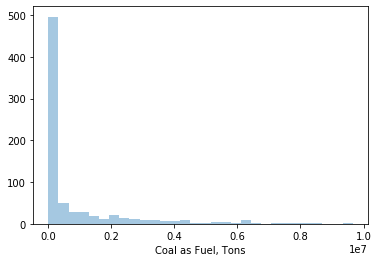

In [0]:
df = detail_df[detail_df['Total_Fuel_Consumption_Quantity'] < 1e7]

df = df.rename(columns={'Total_Fuel_Consumption_Quantity' : 'Coal as Fuel, Tons'})
# df = detail_df[detail_df['Total_Fuel_Consumption_Quantity'] < 5e7]
# df.plot()
sns.distplot(df['Coal as Fuel, Tons'],kde=False, bins=30);
# plt.show()